# QSAM - Exercício Prático 2
Dataset “1991_U.S._General_Social_Survey.xls”.
Utilize a ferramenta que lhe seja mais favorável (R, Phyton, Excel, SPSS,…)  
#### 1.Explore o ficheiro, e faça uma síntese descritiva e gráfica das variáveis 'happy' (felicidade), 'sex', 'life' (tipo de vida) e 'age'.
#### 2.Teste a hipótese de a média das idades dos homens ser igual à das mulheres.

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind
from scipy.stats import norm
import statistics as sta
import warnings
warnings.filterwarnings("ignore")

## Carregamento do ficheiro para análise

In [2]:
df = pd.read_csv('1991_U.S._General_Social_Survey.csv', delimiter=';')

In [3]:
df

,sex,race,region,happy,life,sibs,childs,age,educ,paeduc,...,work6,work7,work8,work9,prob1,prob2,prob3,prob4,Educ2,filter_$
0,2,1,"1,00",1,1,1,2,61,12,97,...,0,0,0,0,#NULO!,#NULO!,#NULO!,#NULO!,4,1
1,2,1,"1,00",2,1,2,1,32,20,20,...,1,2,1,1,2,4,5,#NULO!,6,0
2,1,1,"1,00",1,0,2,1,35,20,16,...,2,2,2,2,#NULO!,#NULO!,#NULO!,#NULO!,6,0
3,2,1,"1,00",9,2,2,0,26,20,20,...,2,2,2,2,2,2,#NULO!,#NULO!,6,0
4,2,2,"1,00",2,1,4,0,25,12,98,...,0,0,0,0,#NULO!,#NULO!,#NULO!,#NULO!,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1,1,"3,00",1,0,4,0,35,12,8,...,2,2,2,2,#NULO!,#NULO!,#NULO!,#NULO!,4,0
1513,1,1,"3,00",2,1,7,0,82,12,4,...,0,0,0,0,#NULO!,#NULO!,#NULO!,#NULO!,4,1
1514,1,1,"3,00",2,0,9,1,30,9,8,...,2,2,2,2,#NULO!,#NULO!,#NULO!,#NULO!,3,0
1515,1,1,"3,00",2,2,5,4,70,12,7,...,1,2,2,2,7,7,#NULO!,#NULO!,4,1


## 1. Análise descritiva das varáveis de interesse

In [4]:
df=df[['sex','happy','life','age']] # criar um novo dataframe com apenas as variáveis de interesse a partir do dataframe fornecido.

In [5]:
df

,sex,happy,life,age
0,2,1,1,61
1,2,2,1,32
2,1,1,0,35
3,2,9,2,26
4,2,2,1,25
...,...,...,...,...
1512,1,1,0,35
1513,1,2,1,82
1514,1,2,0,30
1515,1,2,2,70


In [6]:
df.describe() # método 'describe()' inclui estatísticas como contagem, média, desvio padrão, mínimo, percentis e máximo para cada coluna do DataFrame.
              # Variável 'sex' neste método nao faz muito sentido interpretar, uma vez que 'sex' originalmente é uma variavel categorica que foi representada como numerica.

,sex,happy,life,age
count,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.580751,1.860910,1.104812,45.731707
std,0.493599,0.904274,1.116066,17.948214
min,1.000000,1.000000,0.000000,18.000000
25%,1.000000,1.000000,0.000000,32.000000
50%,2.000000,2.000000,1.000000,41.000000
75%,2.000000,2.000000,2.000000,60.000000
max,2.000000,9.000000,9.000000,99.000000


In [7]:
df.median().reset_index(name='median') # cálculo da mediana para cada uma das variáveis. 
                                       # Variável 'sex' neste método nao faz muito sentido interpretar, uma vez que 'sex' originalmente é uma variavel categorica que foi representada como numerica.

,index,median
0,sex,2.0
1,happy,2.0
2,life,1.0
3,age,41.0


In [8]:
df.mode() # cálculo da moda para cada uma das variáveis.
           # Variável 'sex' neste método nao faz muito sentido interpretar, uma vez que 'sex' originalmente é uma variavel categorica que foi representada como numerica.

,sex,happy,life,age
0,2,2,0,35


## Análise Gráfica das Varáveis

### 'Happy'

In [9]:
df_happy=df.groupby('happy')['happy'].count().sort_values()

In [10]:
df_happy.reset_index(name='count')

,happy,count
0,9,13
1,3,165
2,1,467
3,2,872


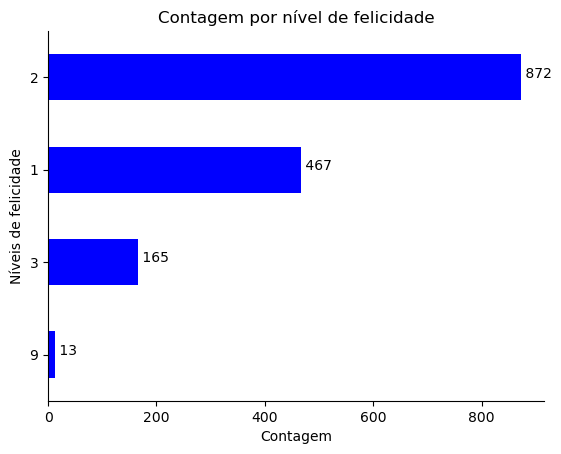

In [11]:
df_happy.plot(kind='barh', color='blue')
plt.title('Contagem por nível de felicidade')
plt.xlabel('Contagem')
for i, v in enumerate(df_happy):
    plt.text(v, i, f'{v: .0f}', color='black')
plt.ylabel('Níveis de felicidade')
sns.despine()
plt.show()

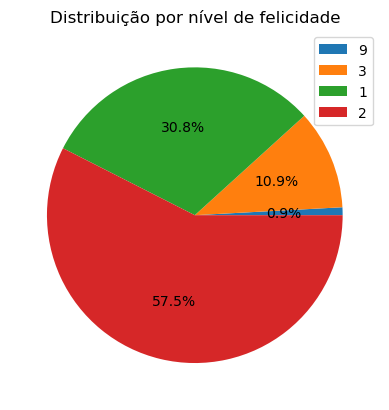

In [12]:
plt.pie(df_happy, autopct='%1.1f%%')
plt.title('Distribuição por nível de felicidade')
plt.legend(labels=df_happy.index, loc='upper right')
plt.show()

### 'Life'

In [13]:
df_life=df.groupby('life')['life'].count().sort_values()

In [14]:
df_life.reset_index(name='count')

,life,count
0,9,5
1,8,8
2,3,41
3,1,434
4,2,505
5,0,524


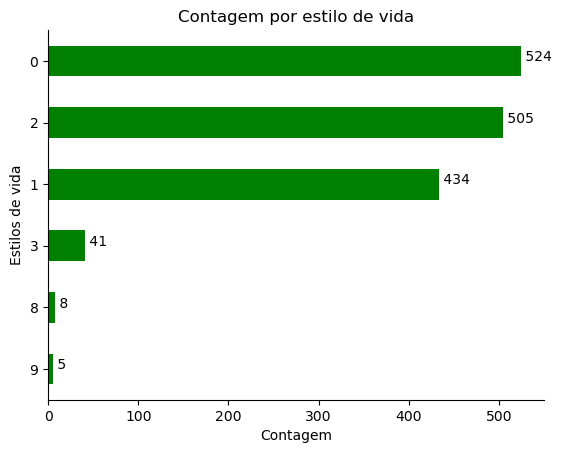

In [15]:
df_life.plot(kind='barh', color= 'green')
plt.title('Contagem por estilo de vida')
plt.xlabel('Contagem')
for i, v in enumerate(df_life):
    plt.text(v, i, f'{v: .0f}', color='black')
plt.ylabel('Estilos de vida')
sns.despine()
plt.show()

### 'Sex'

In [16]:
df['sex'] = df['sex'].replace({1: 'F', 2: 'M'})

In [17]:
df_sex = df[['sex']].value_counts()
df_sex.reset_index(name='count')

,sex,count
0,M,881
1,F,636


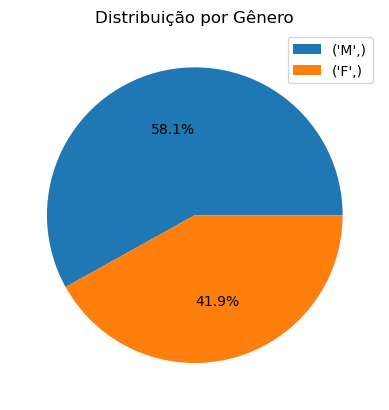

In [18]:
plt.pie(df_sex, autopct='%1.1f%%')
plt.title('Distribuição por Gênero')
plt.legend(labels=df_sex.index, loc='upper right')
plt.show()

### 'Age'

In [19]:
df_age = df[['age']].value_counts()
df_age.reset_index(name='count')

,age,count
0,35,55
1,32,44
2,33,38
3,21,38
4,41,38
...,...,...
67,84,5
68,87,4
69,18,3
70,99,3


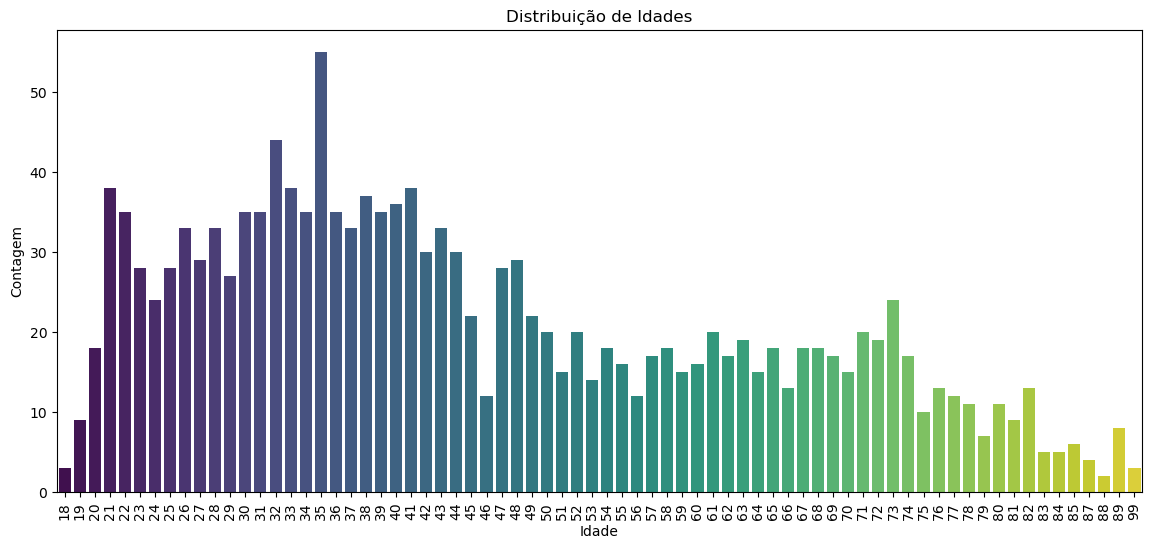

In [20]:
plt.figure(figsize=(14, 6))
palette = sns.color_palette("viridis", n_colors=len(df["age"].unique()))
sns.countplot(x=df["age"], palette=palette)
plt.xticks(rotation=90)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição de Idades')
plt.show()

## 2. Testar a hipótese da média das idades dos homens ser igual à das mulheres.

### Teste de significância - Nível de significância: α = 5%

#### Hipóteses: 

#### H0: a média das idades dos homens é igual à das mulheres.  
#### H1: a média das idades dos homens é diferente da das mulheres.

### Feito "à mão" - teste Z

#### Calculo das médias (X)

In [21]:
age_men = df[df['sex'] == 'M']['age']
age_women = df[df['sex'] == 'F']['age']

In [22]:
mean_age_men=age_men.mean()
mean_age_men

46.851305334846764

In [23]:
mean_age_women=age_women.mean()
mean_age_women

44.180817610062896

#### Calculo dos devios padrão (σ)

In [24]:
desvio_padrao_man = sta.stdev(age_men)
desvio_padrao_man

18.510117657122773

In [25]:
desvio_padrao_woman = sta.stdev(age_women)
desvio_padrao_woman

17.032539769042206

#### Cálculo das populações (n)

In [26]:
n_man= df[df['sex']=='M']['sex'].count()
n_man

881

In [27]:
n_woman= df[df['sex']=='F']['sex'].count()
n_woman

636

#### Teste Z

In [28]:
z= ((mean_age_men)-(mean_age_women))/(np.sqrt((desvio_padrao_man**2 / n_man) + (desvio_padrao_woman**2 / n_woman))) # cálculo do z-score

In [29]:
z

2.9050255577803856

In [30]:
p_value = (1-0.9982) # 0.9803 é retirado da tabela de distribuições a partir do valor do z-score.
p_value

0.0018000000000000238

#### Conclusão
#### α = 5%; p_value = 0.18%
#### α > p_value => Então, rejeitamos H0 => H1: a média das idades dos homens é diferente da das mulheres.

### Feito em Python - teste T

In [31]:
statistic, p_value = ttest_ind(age_men, age_women, equal_var=False) # equal_var=False permite variâncias diferentes entre os grupos.

print("Estatística de teste (t):", statistic)
print("p-value:", p_value)

Estatística de teste (t): 2.905025557780385
p-value: 0.0037287130279952643


In [32]:
α = 0.05

if p_value < α:
    print("Rejeitamos a hipótese nula. Há evidências suficientes para sugerir que há diferença nas médias.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa nas médias.")

Rejeitamos a hipótese nula. Há evidências suficientes para sugerir que há diferença nas médias.


#### Conclusão
#### α = 5%; p_value = 0.37%
#### α > p_value => Então, rejeitamos H0 => H1: a média das idades dos homens é diferente da das mulheres.